In [1]:
!pip3 install decorator==5.0.9

import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import math
import os
import scipy

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.preprocessing import Normalizer
from pathlib import Path


seed = 0
np.random.seed(seed)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Path to the target csv file. This notebook should be in the same folder as the csv-data file 11_Autonomous_Systems.csv
path = os.getcwd()
print(path)

/Users/fmd/Desktop/USI/Semester_4/Data_Analytics/Autonomous-Systems


Question 1 - What does the data look like?

In [3]:
data = pd.read_csv(path+'/11_Autonomous_Systems.csv')
data


,ComputerNumber,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,5,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
149,150,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,151,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
151,152,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


After printing the table we can see that the computer number match the index number. The only difference is that the indexing starts with 0, and the column with the label ComputerNumber starts counting at 1. 

The other 21 columns have labels named after Greek Gods. We can infer that these lables represent the servers' names. It makes more sense to represent the dataframe with the ComputerNumber as index and the servers as columns. 

In [4]:

data = pd.read_csv(path+'/11_Autonomous_Systems.csv',index_col=0)
data

,Zeus,Hera,Poseidon,Demeter,Athena,Apollo,Artemis,Ares,Aphrodite,Hephaestus,...,Hestia,Dionysus,Granite,Mica,Shale,Quartz,Ruby,Atlas,Ryoken,Vulture
ComputerNumber,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


From what can be seen in the data frame, the value for each columns seem to be zeros and ones. let's check that there are no missing values and that they are in fact binary.

Question 2 - Are there any missing values in the data set? If there are not, are all values binary?

In [5]:
#Check that there aren't any missing values in the dataset
check=data.isnull().any().sum()
if check == 0:
    print('There are no missing values in the dataset')
else:
    data= data.replace(np.nan, 0)
    print('There were missing values in the dataset and they were replaced with zeros')



There are no missing values in the dataset


In [6]:
#Check that all values are binary
check = data.columns[data.isin([0,1]).all()]
if len(check) == data.shape[1]:
    print('All values in the columns are binary')
else:
    print('Not all values in the columns are binary')


All values in the columns are binary



Upon confirmation that all values in the columns are binary, we can infer that the value one (1) represents a connection between a computer and a server and conversely, the value zero (0) shows no connection with the server. 

From here we can also infer that a computer can only be connected with a server and a server can only be connected with a computer. 

Question 3 - Which is the least connected server, which is the most connected. Are there any computers that are not connected to any server? if so, which ones?

In [136]:
list_of_column_names = list(data.columns)
list_of_column_names


['Zeus',
 'Hera',
 'Poseidon',
 'Demeter',
 'Athena',
 'Apollo',
 'Artemis',
 'Ares',
 'Aphrodite',
 'Hephaestus',
 'Hermes',
 'Hestia',
 'Dionysus',
 'Granite',
 ' Mica',
 ' Shale',
 ' Quartz',
 ' Ruby',
 ' Atlas',
 ' Ryoken',
 ' Vulture']

Text(0, 0.5, 'Count')

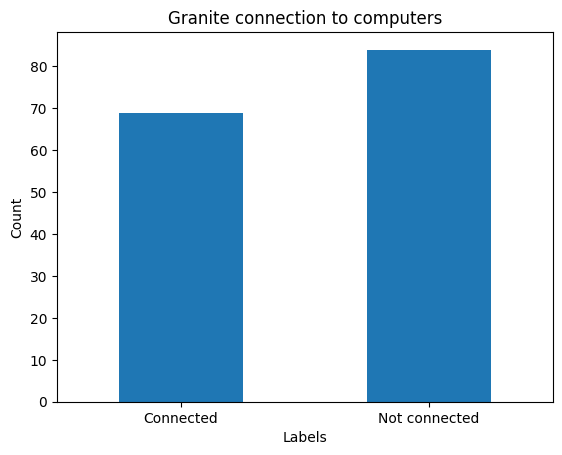

In [135]:
total_cc = pd.DataFrame(data.loc[1:153].sum().astype(int),columns=['Total connected Computers'])

max_cc=total_cc.loc[lambda total_cc: total_cc['Total connected Computers']== total_cc.max( axis='rows')[0]]
a=max_cc.index.values.tolist()

labels = ['Connected','Not connected']
classes = pd.value_counts(data[a[0]], ascending=True)
classes.plot(kind = 'bar', rot=0)
plt.title(a[0]+" connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")


['Hera', 'Hermes', ' Shale', ' Atlas']


Text(0, 0.5, 'Count')

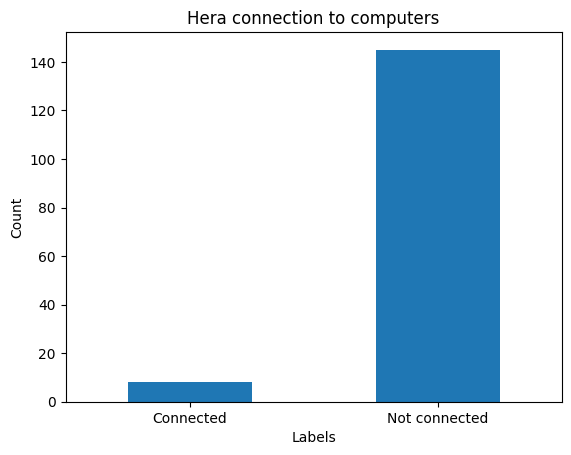

In [150]:
min_cc=total_cc.loc[lambda total_cc: total_cc['Total connected Computers']== total_cc.min( axis='rows')[0]]
a=min_cc.index.values.tolist()
print(a)

labels = ['Connected','Not connected']
classes = pd.value_counts(data[a[0]], ascending=True)
classes.plot(kind = 'bar', rot=0)
plt.title(a[0]+" connection to computers")
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")

In [125]:
not_cc_to_server=pd.DataFrame(data.sum(axis=1))

zero_con=not_cc_to_server.loc[lambda not_cc_to_server:not_cc_to_server[0]==0]

zero_con=zero_con.index.values.tolist()
print('Bellow are the list of computers (ComputerNumber) not connected to any server.')
print(zero_con)


Bellow are the list of computers (ComputerNumber) not connected to any server
[34, 48, 49, 51, 72, 81, 99, 111, 115, 134, 135, 144, 148, 150]


In [133]:
max_con=not_cc_to_server.loc[lambda not_cc_to_server:not_cc_to_server[0]==not_cc_to_server.max( axis='rows')[0]]

max_con=max_con.index.values.tolist()
print('Bellow are the list of computers (ComputerNumber) with the maximum connections to different servers, which is '+str(not_cc_to_server.max( axis='rows')[0]))
print(max_con)

Bellow are the list of computers (ComputerNumber) with the maximum connections to different servers, which is 7
[108, 126]


In [71]:
#listing the conected computers cc and the not conected computers not_cc
cc=[]
not_cc=[]
for i in list_of_column_names:
    cc.append(len(data[data[i] == 1]))
    not_cc.append(len(data[data[i] == 0]))

print(cc)
print(not_cc)    


[23, 8, 9, 10, 52, 17, 10, 46, 17, 20, 8, 11, 11, 69, 12, 8, 16, 12, 8, 16, 17]
[130, 145, 144, 143, 101, 136, 143, 107, 136, 133, 145, 142, 142, 84, 141, 145, 137, 141, 145, 137, 136]


2813

In [9]:
mean_connections=np.mean(cc)
print(mean_connections)

19.047619047619047


Question 4 - What does the distribution look like?

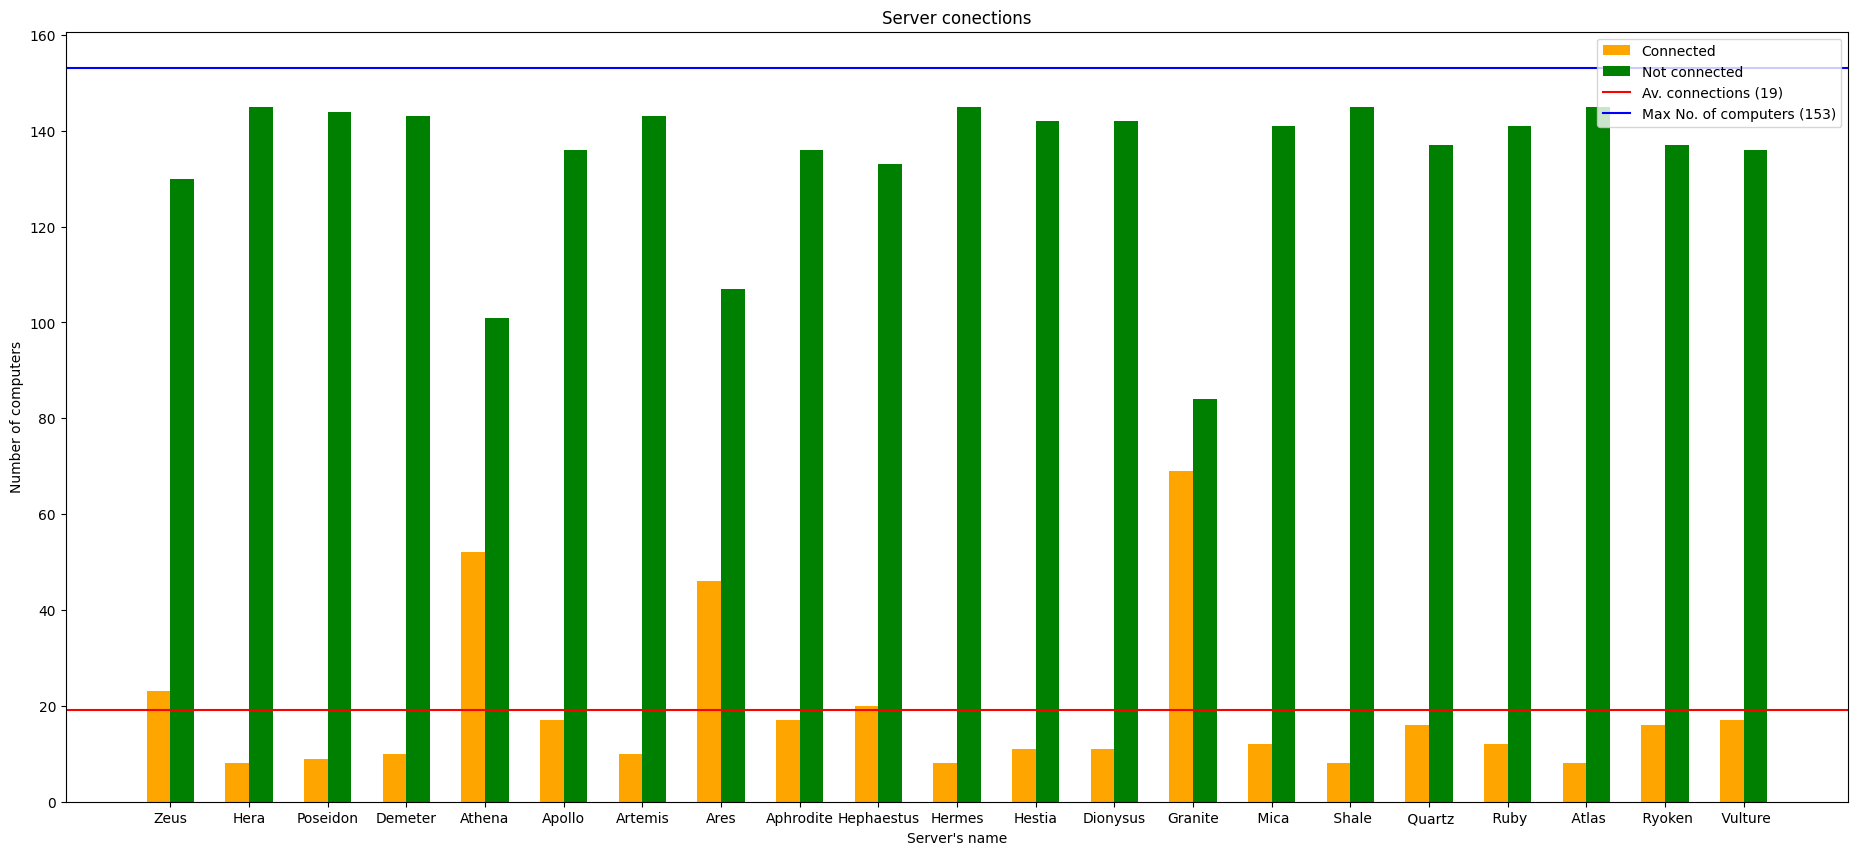

In [10]:
X_axis = np.arange(len(list_of_column_names))

plt.figure(figsize=(23,10))

line1=plt.bar(X_axis - 0.15, cc, 0.3, label = 'Connected',color='orange')
line2=plt.bar(X_axis+ 0.15, not_cc, 0.3, label = 'Not connected',color='green')
line3=plt.axhline(y=mean_connections,c='red', label= 'Av. connections (19)')
line4=plt.axhline(y=153,c='blue', label= 'Max No. of computers (153)')
plt.xticks(X_axis, list_of_column_names)
plt.xlabel("Server's name")
plt.ylabel("Number of computers")
plt.title("Server conections")
# plt.legend(handles=[line1,line3,line4])
plt.legend(handles=[line1,line2,line3,line4])
plt.show()


Question 5 - How may servers share the same Computers, i.e. Which servers have the most computers in common?

In [138]:
#construncting the dataframe
col_name=[]
for column_headers in data.columns[0:21]:
    col_name.append(column_headers)

weighted_adj=[]
for i in col_name:
    row=[]
    for j in col_name:
        
        a=data.loc[:,i][data[i]==1]
        b=data.loc[:,j][data[j]==1]
        array1 = a.index.to_numpy()
        array2 = b.index.to_numpy()

        inter= list(set(array1) & set(array2))
        if i!= j:
            row.append(len(inter))
        else:
            row.append(0)
        
    weighted_adj.append(row)

# print(weighted_adj)
adj=np.array(weighted_adj)
print(adj.shape)
print(adj)
ind = np.unravel_index(np.argmax(adj, axis=None), adj.shape)
# max value of the computers shown 
print(adj[ind])


(21, 21)
[[ 0  0  1  0  4  4  2  4 12  2  0  2  3 11  1  4  3  9  4  4  5]
 [ 0  0  0  0  6  0  0  5  0  0  0  0  0  3  1  0  0  0  0  0  0]
 [ 1  0  0  0  1  6  0  3  1  0  0  0  0  8  0  2  0  0  2  1  0]
 [ 0  0  0  0  1  0  0  1  0  2  7  0  1  9  0  0  1  0  0  1  2]
 [ 4  6  1  1  0  5  2 33  0  6  1  5  5 21  6  1  4  0  1  4  3]
 [ 4  0  6  0  5  0  2  5  2  2  0  0  0 14  0  2  1  1  2  3  3]
 [ 2  0  0  0  2  2  0  2  2  0  0  0  0  2  0  1  2  2  1  1  2]
 [ 4  5  3  1 33  5  2  0  1  4  1  1  4 19  2  3  4  1  3  4  4]
 [12  0  1  0  0  2  2  1  0  1  0  2  2  6  1  0  2 11  0  5  2]
 [ 2  0  0  2  6  2  0  4  1  0  3  0  0 14  1  0  1  0  0  4  4]
 [ 0  0  0  7  1  0  0  1  0  3  0  0  0  7  0  0  1  0  0  1  2]
 [ 2  0  0  0  5  0  0  1  2  0  0  0  4  0  4  0  0  2  0  0  0]
 [ 3  0  0  1  5  0  0  4  2  0  0  4  0  0  4  0  0  3  0  0  0]
 [11  3  8  9 21 14  2 19  6 14  7  0  0  0  0  5  9  3  5  7 14]
 [ 1  1  0  0  6  0  0  2  1  1  0  4  4  0  0  0  0  2  0  0  0]
 

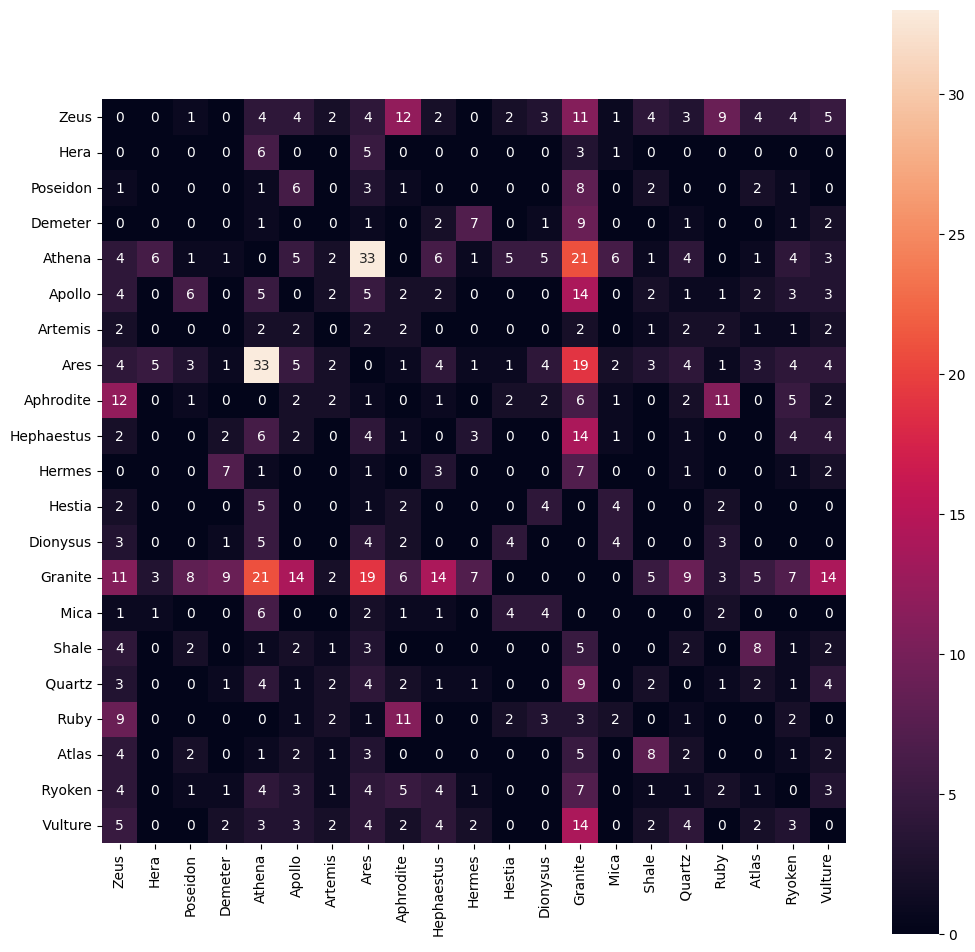

In [149]:
heapMapCorrFeature = pd.DataFrame(adj,index=list_of_column_names,columns=list_of_column_names) #divided by 33 which is the maximum number of same connection in the matrix
fig = plt.figure(figsize=(12,12))
sns.heatmap(heapMapCorrFeature, annot=True, square = True)
plt.show()

In [147]:
#construncting the dataframe
col_name=[]
for column_headers in data.columns[0:21]:
    col_name.append(column_headers)

weighted_adj=[]
tot_adj=[]
for i in col_name:
    row=[]
    row2=[]
    for j in col_name:
        
        a=data.loc[:,i][data[i]==1]
        b=data.loc[:,j][data[j]==1]
        array1 = a.index.to_numpy()
        array2 = b.index.to_numpy()

        inter= list(set(array1) & set(array2))
        if i!= j:
            row.append(len(inter))
            row2.append(len(array1)+len(array2)-len(inter))
        else:
            row.append(len(inter))
            row2.append(len(array1)+len(array2)-len(inter))
        
    weighted_adj.append(row)
    tot_adj.append(row2)

# print(weighted_adj)
weighted_adj=np.array(weighted_adj)
tot_adj=np.array(tot_adj)
print(weighted_adj.shape)
print(weighted_adj)
ind = np.unravel_index(np.argmax(weighted_adj, axis=None), weighted_adj.shape)
# max value of the computers shown 
print(weighted_adj[ind])
print(tot_adj)


(21, 21)
[[23  0  1  0  4  4  2  4 12  2  0  2  3 11  1  4  3  9  4  4  5]
 [ 0  8  0  0  6  0  0  5  0  0  0  0  0  3  1  0  0  0  0  0  0]
 [ 1  0  9  0  1  6  0  3  1  0  0  0  0  8  0  2  0  0  2  1  0]
 [ 0  0  0 10  1  0  0  1  0  2  7  0  1  9  0  0  1  0  0  1  2]
 [ 4  6  1  1 52  5  2 33  0  6  1  5  5 21  6  1  4  0  1  4  3]
 [ 4  0  6  0  5 17  2  5  2  2  0  0  0 14  0  2  1  1  2  3  3]
 [ 2  0  0  0  2  2 10  2  2  0  0  0  0  2  0  1  2  2  1  1  2]
 [ 4  5  3  1 33  5  2 46  1  4  1  1  4 19  2  3  4  1  3  4  4]
 [12  0  1  0  0  2  2  1 17  1  0  2  2  6  1  0  2 11  0  5  2]
 [ 2  0  0  2  6  2  0  4  1 20  3  0  0 14  1  0  1  0  0  4  4]
 [ 0  0  0  7  1  0  0  1  0  3  8  0  0  7  0  0  1  0  0  1  2]
 [ 2  0  0  0  5  0  0  1  2  0  0 11  4  0  4  0  0  2  0  0  0]
 [ 3  0  0  1  5  0  0  4  2  0  0  4 11  0  4  0  0  3  0  0  0]
 [11  3  8  9 21 14  2 19  6 14  7  0  0 69  0  5  9  3  5  7 14]
 [ 1  1  0  0  6  0  0  2  1  1  0  4  4  0 12  0  0  2  0  0  0]
 

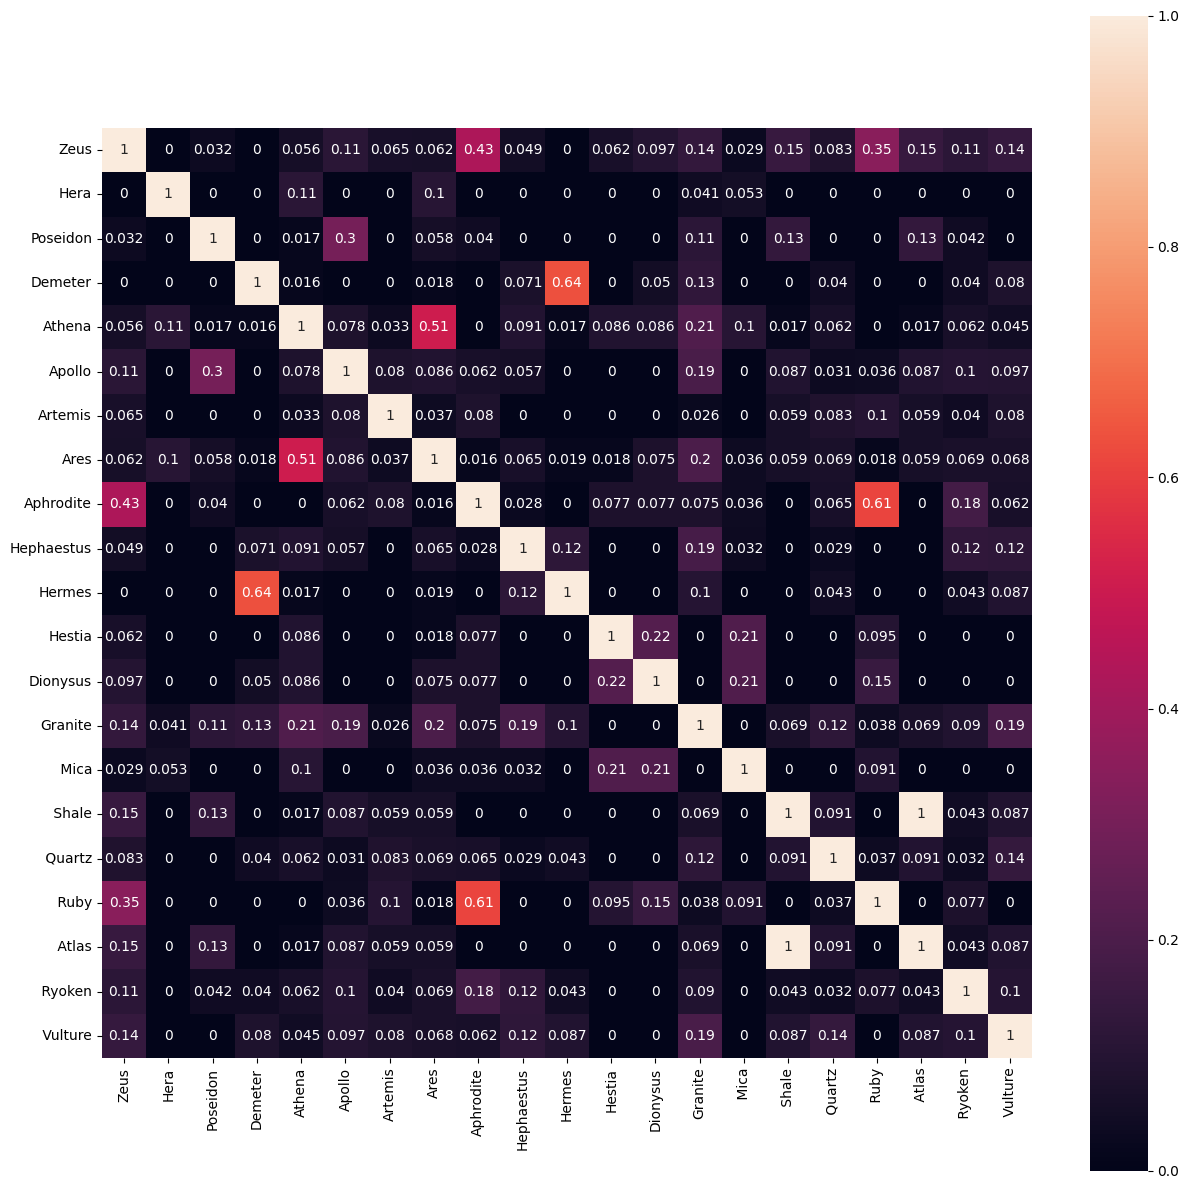

In [151]:
heapMapCorrFeature = pd.DataFrame(weighted_adj/tot_adj,index=list_of_column_names,columns=list_of_column_names) #divided by 33 which is the maximum number of same connection in the matrix
fig = plt.figure(figsize=(15,15))
sns.heatmap(heapMapCorrFeature, annot=True, square = True)
plt.show()

In [ ]:
summary